# Explore here

In [1]:
# Basics
import pandas as pd
import numpy as np

# VISUALIZACION
import matplotlib.pyplot as plt
import seaborn as sns

# ESCALAMIENTO
from sklearn.preprocessing import MinMaxScaler

# SELECCION DE PARAMETROS
from sklearn.feature_selection import chi2, SelectKBest

# MODELOS
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# METRICAS
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# GUARDADO DEL MODELO
from pickle import dump

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/sergio-roque-decision-tree/refs/heads/main/data/processed/train_data.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/sergio-roque-decision-tree/refs/heads/main/data/processed/test_data.csv")

In [3]:
X_train = train_data.drop("Outcome", axis=1)
y_train = train_data["Outcome"]

X_test = test_data.drop("Outcome", axis=1)
y_test = test_data["Outcome"]

In [4]:
# Escalado
# Instancio el escalador
scaler = MinMaxScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_train)

# Aplico el escalador en ambos
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.529412,0.696774,0.633333,0.293478,0.326403,0.503145,0.346318,0.200000
1,0.117647,0.845161,0.800000,0.239130,0.224532,0.147799,0.103596,0.016667
2,0.117647,0.541935,0.633333,0.326087,0.349272,0.789308,0.488014,0.166667
3,0.470588,0.406452,0.666667,0.239130,0.224532,0.201258,0.330479,0.216667
4,0.235294,0.509677,0.666667,0.086957,0.336798,0.433962,0.153682,0.216667


In [5]:
# Selección de parámetros
# selection_model = SelectKBest(chi2, k = 8)
# selection_model.fit(X_train_scal, y_train)
# ix = selection_model.get_support()
# X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
# X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

# SELECCIONARE PARAMETROS MAS RELEVANTES AL FINAL CON feature_importances_

X_test_sel = X_test_scal.copy()

X_train_sel = X_train_scal.copy()
X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.529412,0.696774,0.633333,0.293478,0.326403,0.503145,0.346318,0.200000
1,0.117647,0.845161,0.800000,0.239130,0.224532,0.147799,0.103596,0.016667
2,0.117647,0.541935,0.633333,0.326087,0.349272,0.789308,0.488014,0.166667
3,0.470588,0.406452,0.666667,0.239130,0.224532,0.201258,0.330479,0.216667
4,0.235294,0.509677,0.666667,0.086957,0.336798,0.433962,0.153682,0.216667


In [6]:
# modelo
# default n_estimators=100
model = RandomForestClassifier(random_state = 42)

# entrenamiento
model.fit(X_train_sel, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# predicción
y_pred_test = model.predict(X_test_sel)
y_pred_test

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [8]:
y_pred_train = model.predict(X_train_sel)
y_pred_train

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [9]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7647058823529411
F1 score Test:  0.7647058823529411
Precision Test:  0.7647058823529411
Recall Test:  0.7647058823529411
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


El random forest sin optimizacion de parametros ya mejora el rendimiento del arbol de decision en un 6% y el del arbol de decision optimizado en un 2%.
Optimizare algunos parametros para comprobar cuanto mejora aun mas la eficiencia del modelo

In [ ]:
# param_grid = {
#     'n_estimators': [50, 100, 200],           # Número de árboles en el bosque
#     'max_depth': [None, 5, 10, 20],           # Profundidad máxima de cada árbol
#     'min_samples_split': [2, 5, 10],          # Mínimo de muestras para dividir un nodo
#     'min_samples_leaf': [1, 2, 4],            # Mínimo de muestras en una hoja
#     'max_features': ['sqrt', 'log2'],         # Número de características a considerar en cada división
#     'bootstrap': [True, False],               # Si usar bootstrap o no
#     'class_weight': [None, 'balanced']        # Para tratar el desbalance de clases
# }

# # Configuramos el GridSearchCV
# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=5,                    # Validación cruzada con 5 folds
#     scoring='accuracy',     # Puedes cambiarlo a 'roc_auc', 'f1', etc. si te interesa otra métrica
#     n_jobs=-1,              # Usa todos los núcleos disponibles para paralelizar
#     verbose=2
# )
# grid_search.fit(X_train, y_train)

In [ ]:
# print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'bootstrap': True, 'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [17]:
# modelo con parametros optimizados encontrados con combinaciones de grid search y algunas ejecuciones de random search
model = RandomForestClassifier(criterion="entropy", max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, random_state = 42, n_estimators=50)

# entrenamiento
model.fit(X_train_sel, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [18]:
# predicción
y_pred_test = model.predict(X_test_sel)
y_pred_train = model.predict(X_train_sel)

# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.8104575163398693
F1 score Test:  0.8104575163398693
Precision Test:  0.8104575163398693
Recall Test:  0.8104575163398693
Accuracy Train:  0.8540983606557377
F1 score Train:  0.8540983606557377
Precision Train:  0.8540983606557377
Recall Train:  0.8540983606557377


In [19]:
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train_sel.columns, 'Importance': importances})
feature_importance.sort_values('Importance', ascending=False, inplace=True)
print(feature_importance)

                    Feature  Importance
1                   Glucose    0.448370
5                       BMI    0.193492
7                       Age    0.122922
6  DiabetesPedigreeFunction    0.078730
2             BloodPressure    0.043428
0               Pregnancies    0.041485
4                   Insulin    0.040053
3             SkinThickness    0.031519


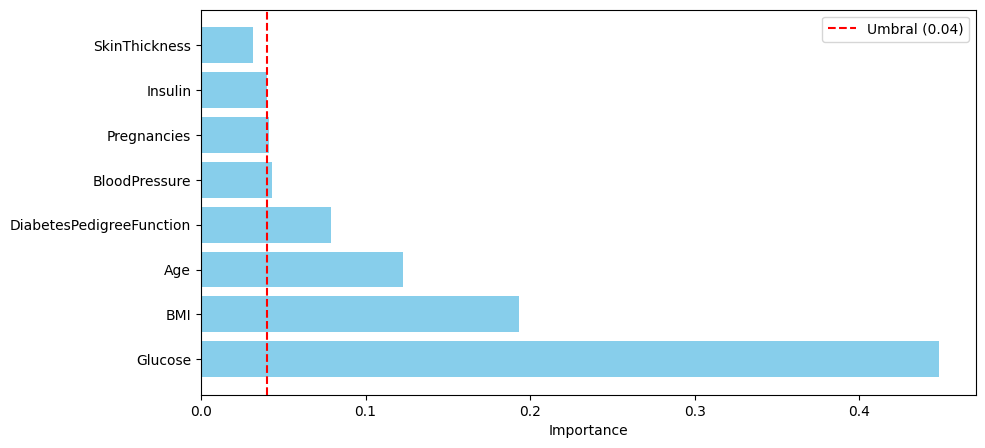

In [20]:
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.axvline(x=0.04, color='red', linestyle='--', label='Umbral (0.04)')
plt.legend()
plt.show()

In [21]:
X_test_sel = X_test_sel.drop("SkinThickness", axis=1)
X_train_sel = X_train_sel.drop("SkinThickness", axis=1)

In [24]:
# 'bootstrap': True, 'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50
# modelo con parametros optimizados encontrados con combinaciones de grid search y algunas ejecuciones de random search
model = RandomForestClassifier(criterion="entropy", max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, random_state = 42, n_estimators=50)

# entrenamiento
model.fit(X_train_sel, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [25]:
# predicción
y_pred_test = model.predict(X_test_sel)
y_pred_train = model.predict(X_train_sel)

# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.803921568627451
F1 score Test:  0.803921568627451
Precision Test:  0.803921568627451
Recall Test:  0.803921568627451
Accuracy Train:  0.8524590163934426
F1 score Train:  0.8524590163934426
Precision Train:  0.8524590163934426
Recall Train:  0.8524590163934426


Con los parametros optimizados de antes en el random_forest y la nueva seleccion de parametros por feature_importance disminuye un 1% el accuracy, se puede considerar hacerle un grid search a los datos de entrenamiento reducidos y buscar mejorar aun mas los resultados. Por ahora se considera el mejor modelo obtenido el random_forest mencionado anteriormente con la optimizacion y un accuracy de 81% aprox., que ademas no da muestras de overfitting considerando la cercanía del accuracy entre train y test.

El guardado del modelo final y visualización de resultados lo realizaremos desde el app.py